In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('loan_defaulters.csv')
df.head()

,customer.id,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,inq.last.6mths,delinq.2yrs,paid.back.loan
0,LA001,Yes,debt_consolidation,11.89%,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,Less than 5,No,Yes
1,LA002,Yes,credit_card,10.71%,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,Less than 5,No,Yes
2,LA003,Yes,debt_consolidation,13.57%,366.86,10.373491,11.63,682,4710.000000,3511,25.6,0,Less than 5,No,Yes
3,LA004,Yes,debt_consolidation,10.08%,162.34,11.350407,8.10,712,2699.958333,33667,73.2,0,Less than 5,No,Yes
4,LA005,Yes,credit_card,14.26%,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,Less than 5,Yes,Yes


In [13]:

p_a = df[df['fico'].astype(float) >700].shape[0]/df.shape[0]
print(p_a)


# probability of purpose == debt_consolidation
p_b = df[df['purpose']== 'debt_consolidation'].shape[0]/df.shape[0]
print(p_b)

# Create new dataframe for condition ['purpose']== 'debt_consolidation' 
df1 = df[df['purpose']== 'debt_consolidation']

# Calculate the P(A|B)
p_a_b = df1[df1['fico'].astype(float) >700].shape[0]/df1.shape[0]
print(p_a_b)
# Check whether the P(A) and P(B) are independent from each other
result = (p_a == p_a_b)
print(result)

0.5593025683858843
0.4131342660263103
0.489764973464746
False


## Bayes theorem
Calculating conditional probabilty is the very important step. Let's calculate the bayes theorem for the probability of credit policy is yes and the person is given the loan.

In [45]:
# probability of paid_back_loan is Yes
prob_lp = df[df['paid.back.loan'] == 'Yes'].shape[0] / df.shape[0]
print(prob_lp)

# probability of the credit policy is Yes
prob_cs = df[df['credit.policy'] == 'Yes'].shape[0]  / df.shape[0]
print(prob_cs)
# create new dataframe for paid.back.loan == 'Yes'
new_df = df[df['paid.back.loan'] == 'Yes']

# Calculate the P(B|A)
prob_pd_cs = new_df[new_df['credit.policy'] == 'Yes'].shape[0] / new_df.shape[0]

print(prob_pd_cs)

# bayes theorem 

bayes = (prob_pd_cs * prob_lp)/ prob_cs

# print bayes
print(bayes)

0.8399457089162664
0.8049697222802256
0.8323182100683655
0.8684824902723735


## Purpose vs paid back loan
Let's visualize the bar plot for the purpose and again using condition where

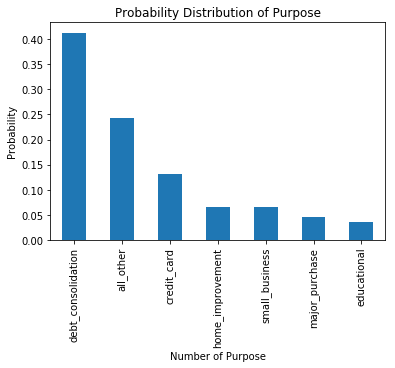

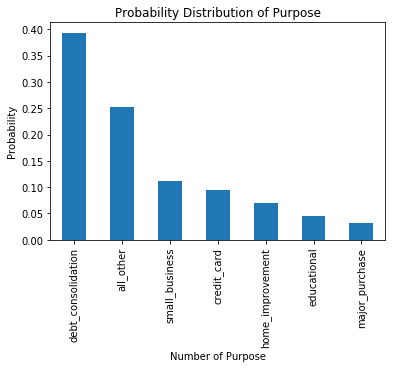

In [54]:
# create bar plot for purpose
df.purpose.value_counts(normalize=True).plot(kind='bar')
plt.title("Probability Distribution of Purpose")
plt.ylabel("Probability")
plt.xlabel("Number of Purpose")
plt.show()

#create new dataframe for paid.back.loan == 'No'
df1= df[df['paid.back.loan'] == 'No']

# plot the bar plot for 'purpose' where paid.back.loan == No 
df1.purpose.value_counts(normalize=True).plot(kind='bar')
plt.title("Probability Distribution of Purpose")
plt.ylabel("Probability")
plt.xlabel("Number of Purpose")
plt.show()

## Let's plot the histogram for visualization of the continuous variable. So that you will get the basic idea about how the distribution of continuous variables looks like.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


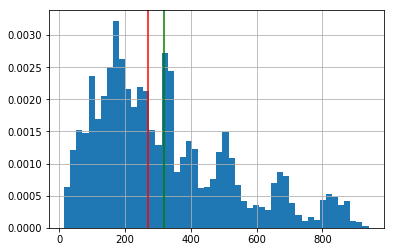

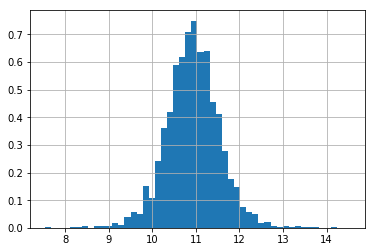

In [63]:

# Calculate median 
inst_median = df['installment'].median()
inst_mean = df['installment'].mean()


# histogram for installment
df['installment'].hist(normed = True, bins=50)
plt.axvline(x=inst_median,color='r')
plt.axvline(x=inst_mean,color='g')

plt.show()

#histogram for log anual income
df['log.annual.inc'].hist(normed = True, bins=50)
plt.show()